=== DESCRIPTIVE STATISTICS (Numerical Data) ===


,z1000t,z0t,z1000mem,z1000rel,m1000rel,whours
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000
mean,8.161075,0.309600,29879.600000,92.577125,74.467500,8.52950
std,25.794414,0.361484,20653.096577,24.579252,40.341441,10.15679
min,0.017000,0.000000,2952.000000,0.000000,0.000000,0.00000
25%,0.237500,0.067000,17230.000000,99.240000,10.200000,3.12750
50%,0.617000,0.167000,22552.000000,100.000000,98.400000,6.17000
75%,1.770750,0.454250,40434.000000,100.000000,100.000000,9.72500
max,202.800000,2.017000,91120.000000,100.000000,100.000000,63.20000


<Figure size 1200x800 with 0 Axes>

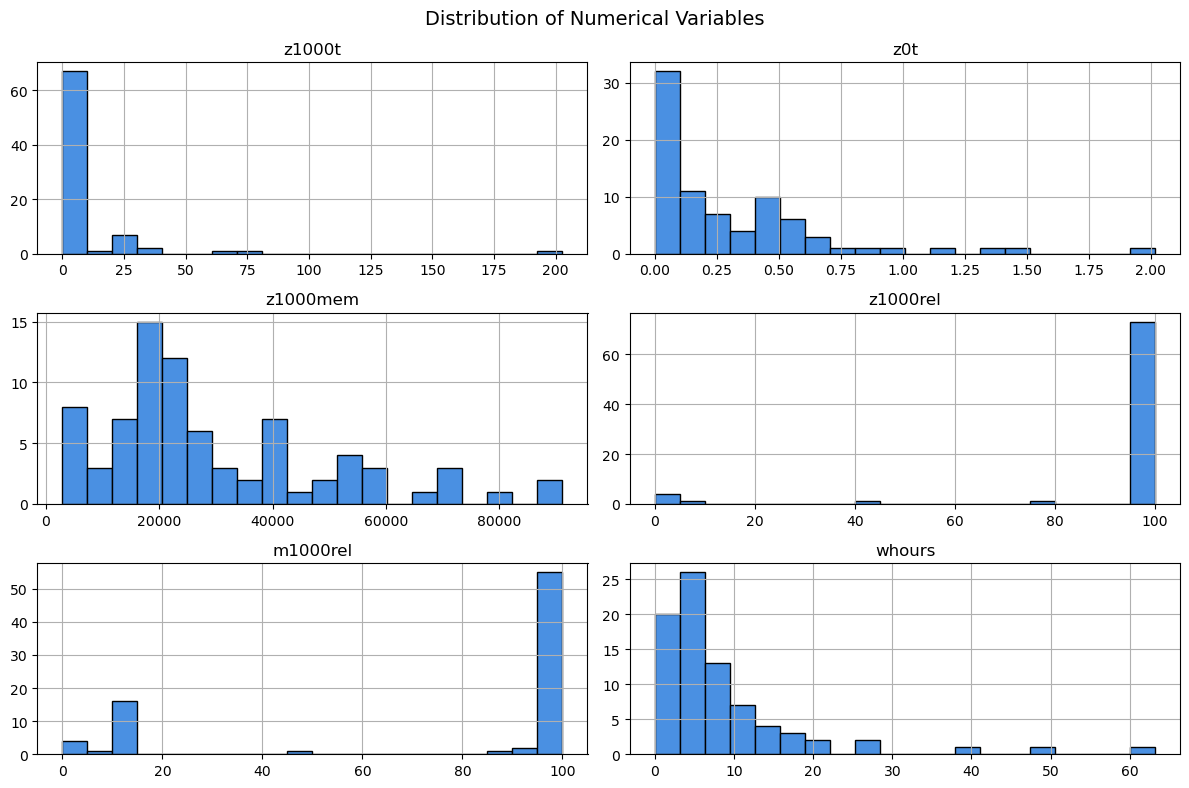


=== DESCRIPTIVE STATISTICS (Categorical Data) ===


,person,lang,caps
count,80,80,38
unique,80,7,5
top,s018,java,10-25%
freq,1,24,15



=== MISSING VALUES PER COLUMN ===
person       0
lang         0
z1000t       0
z0t          0
z1000mem     0
z1000rel     0
m1000rel     0
whours       0
caps        42
dtype: int64


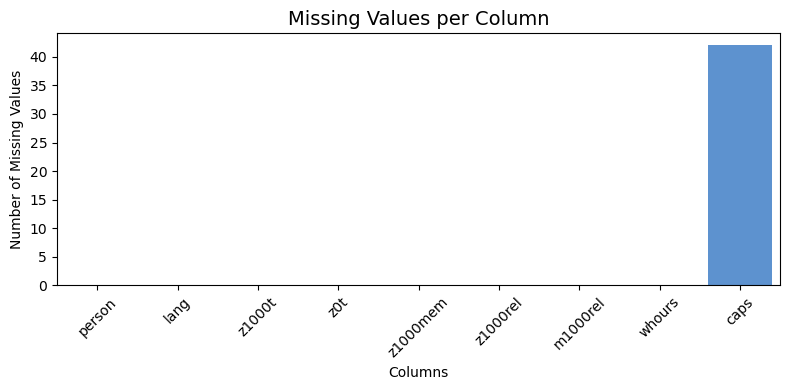

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load your cleaned dataset ---
df = pd.read_csv("assignment_3_dataset_clean.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# --- Descriptive statistics for numerical columns ---
print("=== DESCRIPTIVE STATISTICS (Numerical Data) ===")
display(df.describe())

# --- Detailed histograms for numerical columns ---
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(7, 4))
    sns.histplot(df[col], bins=20, kde=True, color="#4a90e2", edgecolor="black")
    plt.axvline(df[col].mean(), color="red", linestyle="--", label=f"Mean = {df[col].mean():.2f}")
    plt.axvline(df[col].median(), color="green", linestyle="-.", label=f"Median = {df[col].median():.2f}")
    plt.title(f"Histogram for {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.legend()
    plt.tight_layout()
    plt.show()

# --- Descriptive statistics for categorical columns ---
print("\n=== DESCRIPTIVE STATISTICS (Categorical Data) ===")
display(df.describe(include=['object']))

# --- Missing values summary ---
print("\n=== MISSING VALUES PER COLUMN ===")
missing_values = df.isna().sum()
print(missing_values)

# --- Bar chart of missing values ---
plt.figure(figsize=(8, 4))
sns.barplot(
    x=missing_values.index,
    y=missing_values.values,
    color="#4a90e2"
)
plt.title("Missing Values per Column", fontsize=14)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
